In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
weather = pd.read_csv("D:/humanda/WORKSPACE/projects_mook/data-files2/기상.csv", encoding="EUC-KR")
cabbage = pd.read_csv("D:/humanda/WORKSPACE/projects_mook/data-files2/양배추.csv", encoding="EUC-KR")
cabbage_product = pd.read_csv("D:/humanda/WORKSPACE/projects_mook/data-files2/양배추_반입량.csv", encoding="EUC-KR")

In [112]:
weather = weather[['지점명', '일시', '평균기온(°C)', '월합강수량(00~24h만)(mm)']]

In [113]:
weather = weather.rename(columns={'일시' : 'DATE', '평균기온(°C)' : '평균기온', '월합강수량(00~24h만)(mm)': '강수량'})
weather

,지점명,DATE,평균기온,강수량
0,속초,2019-01,1.7,8.7
1,속초,2019-02,2.5,27.6
2,속초,2019-03,8.2,44.4
3,속초,2019-04,11.9,80.9
4,속초,2019-05,19.8,5.7
...,...,...,...,...
975,정선군,2024-06,21.9,163.5
976,정선군,2024-07,25.4,341.0
977,정선군,2024-08,27.0,75.7
978,정선군,2024-09,22.5,243.9


In [114]:
weather.info()
weather = weather.fillna(0)
weather['DATE'] = pd.to_datetime(weather['DATE'], format='%Y-%m').dt.to_period('M')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점명     980 non-null    object 
 1   DATE    980 non-null    object 
 2   평균기온    980 non-null    float64
 3   강수량     979 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.8+ KB


In [115]:
weather = weather[weather['지점명'] == '정선군']

In [116]:
weather = weather[['DATE', '평균기온', '강수량']]

In [117]:
cabbage

,DATE,품목명,단위,등급명,평균가격,전년,평년
0,202410,양배추,8키로망대,특,"13,009","13,786","11,078"
1,202410,양배추,8키로망대,상,"10,383","11,244","9,128"
2,202410,양배추,8키로망대,중,"7,196","7,988","6,812"
3,202410,양배추,8키로망대,하,"4,805","5,002","4,661"
4,202409,양배추,8키로망대,특,"11,100","12,784","9,153"
...,...,...,...,...,...,...,...
275,201902,양배추,8키로망대,하,"1,683","3,347","2,734"
276,201901,양배추,8키로망대,특,"5,407","10,095","7,250"
277,201901,양배추,8키로망대,상,"4,166","7,161","5,310"
278,201901,양배추,8키로망대,중,"3,085","4,903","3,566"


In [118]:
cabbage['DATE'] = pd.to_datetime(cabbage['DATE'], format='%Y%m').dt.to_period('M')

In [119]:
cabbage = cabbage[['DATE', '품목명', '단위', '등급명', '평균가격']]


In [120]:
cabbage_product = cabbage_product[['DATE', '총반입량']]

In [121]:
cabbage_product['DATE'] = pd.to_datetime(cabbage_product['DATE'], format='%Y%m').dt.to_period('M')

In [122]:
df_merged = pd.merge(cabbage, weather, on='DATE', how='left')

In [123]:
df_merged = pd.merge(df_merged, cabbage_product, on='DATE', how='left')

In [124]:
df_merged['평균가격'] = df_merged['평균가격'].str.replace(',', '').astype(int)

In [125]:
df_merged_1 = df_merged[df_merged['등급명'] == '특']
df_merged_2 = df_merged[df_merged['등급명'] == '상']
df_merged_3 = df_merged[df_merged['등급명'] == '중']
df_merged_4 = df_merged[df_merged['등급명'] == '하']

In [126]:
df_merged_1

,DATE,품목명,단위,등급명,평균가격,평균기온,강수량,총반입량
0,2024-10,양배추,8키로망대,특,13009,13.5,156.2,8904
4,2024-09,양배추,8키로망대,특,11100,22.5,243.9,7862
8,2024-08,양배추,8키로망대,특,10309,27.0,75.7,8626
12,2024-07,양배추,8키로망대,특,5955,25.4,341.0,7690
16,2024-06,양배추,8키로망대,특,7623,21.9,163.5,9097
...,...,...,...,...,...,...,...,...
260,2019-05,양배추,8키로망대,특,5902,17.2,18.5,6806
264,2019-04,양배추,8키로망대,특,3769,9.9,59.0,6510
268,2019-03,양배추,8키로망대,특,3851,4.9,57.0,6718
272,2019-02,양배추,8키로망대,특,4463,0.0,30.0,5557


In [127]:
df_merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 276
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   DATE    70 non-null     period[M]
 1   품목명     70 non-null     object   
 2   단위      70 non-null     object   
 3   등급명     70 non-null     object   
 4   평균가격    70 non-null     int32    
 5   평균기온    70 non-null     float64  
 6   강수량     70 non-null     float64  
 7   총반입량    70 non-null     int64    
dtypes: float64(2), int32(1), int64(1), object(3), period[M](1)
memory usage: 4.6+ KB


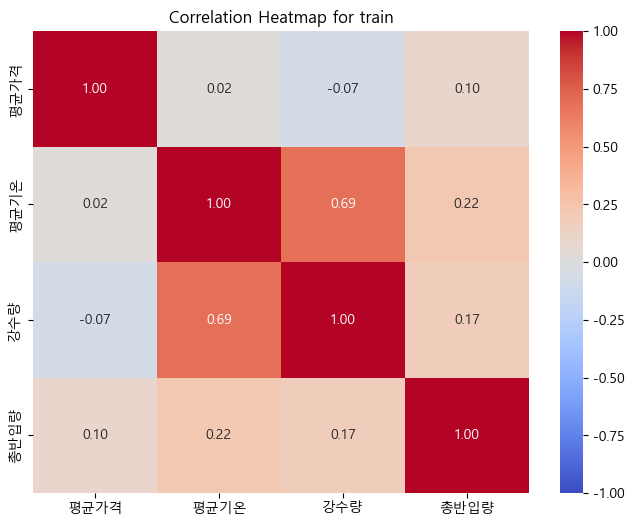

Correlation with total_passenger:
평균가격    1.000000
평균기온    0.018770
강수량    -0.073647
총반입량    0.097126
Name: 평균가격, dtype: float64


In [136]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

columns_of_interest = ['평균가격','평균기온', '강수량', '총반입량']
df_selected = df_merged_4[columns_of_interest]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for train")

plt.show()

total_passenger_correlation = correlation_matrix['평균가격']
print("Correlation with total_passenger:")
print(total_passenger_correlation)